In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from os import path
import matplotlib.ticker as ticker

labels = ["paiceHusk", "krovetz", "sStripper", "porter2", "lovins", "wikt", "none"]
collection_n_values = [1,2,4,8,16,32,64,128,256]
collection_sizes = [52342886, 26171443, 13085721, 6542860, 3271430, 1635715, 817857, 408928, 204464]
data_dir_2013 = path.join("Data", "clueweb-2013")

### Preparing data for Collection Size

In [36]:
# Initialize data dictionary with column names and empty lists
data = {"n" : [], "size" : [], "stemmer" : [], "nERR-IA" : [], "nDCG" : []}
for collection_n, collection_size in zip(collection_n_values, collection_sizes):
    # Load data from each text file - directory structure based on the value of collection_size
    nERR = np.loadtxt(path.join(data_dir_2013,f"n-{collection_n}/nERR-{collection_n}"))
    nDCG = np.loadtxt(path.join(data_dir_2013, f"n-{collection_n}/nDCG-{collection_n}"))
    
    # Extend the data lists with the loaded data and labels
    data["n"].extend([collection_n for _ in labels])
    data["size"].extend([collection_size for _ in labels])
    data["stemmer"].extend(labels)
    data["nERR-IA"].extend(nERR)
    data["nDCG"].extend(nDCG)

clueweb_2013 = pd.DataFrame(data=data)
clueweb_2013 = clueweb_2013.melt(id_vars=["n", "size", "stemmer"]).rename({"variable": "measure"}, axis="columns")
display(clueweb_2013)

,n,size,stemmer,measure,value
0,1,52342886,paiceHusk,nERR-IA,0.373226
1,1,52342886,krovetz,nERR-IA,0.381737
2,1,52342886,sStripper,nERR-IA,0.397822
3,1,52342886,porter2,nERR-IA,0.402487
4,1,52342886,lovins,nERR-IA,0.369489
...,...,...,...,...,...
121,256,204464,sStripper,nDCG,0.030090
122,256,204464,porter2,nDCG,0.038986
123,256,204464,lovins,nDCG,0.025991
124,256,204464,wikt,nDCG,0.029902


### nERR-IA 

In [44]:
nERR = clueweb_2013[clueweb_2013["measure"]=="nERR-IA"]

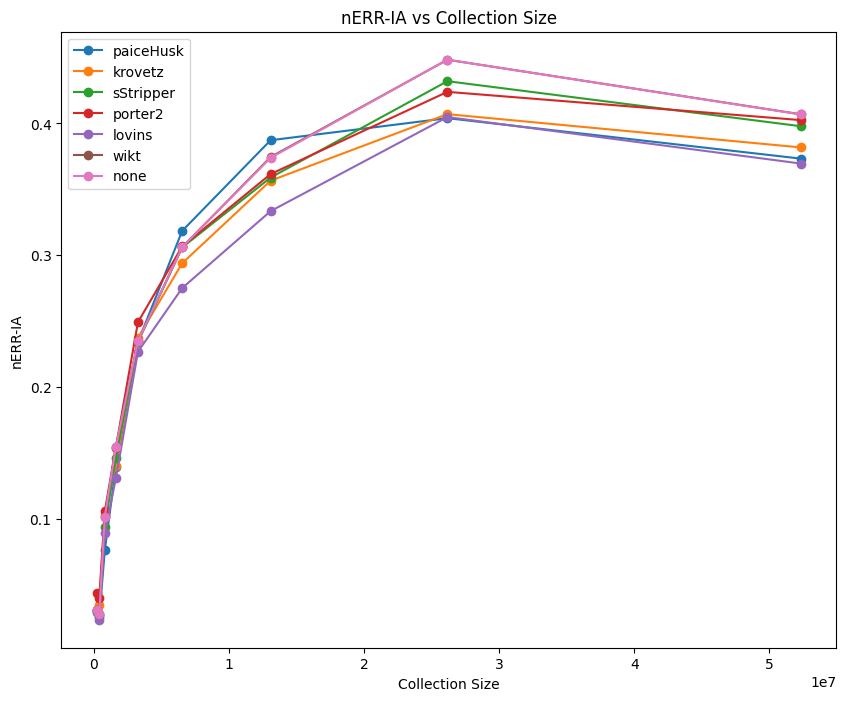

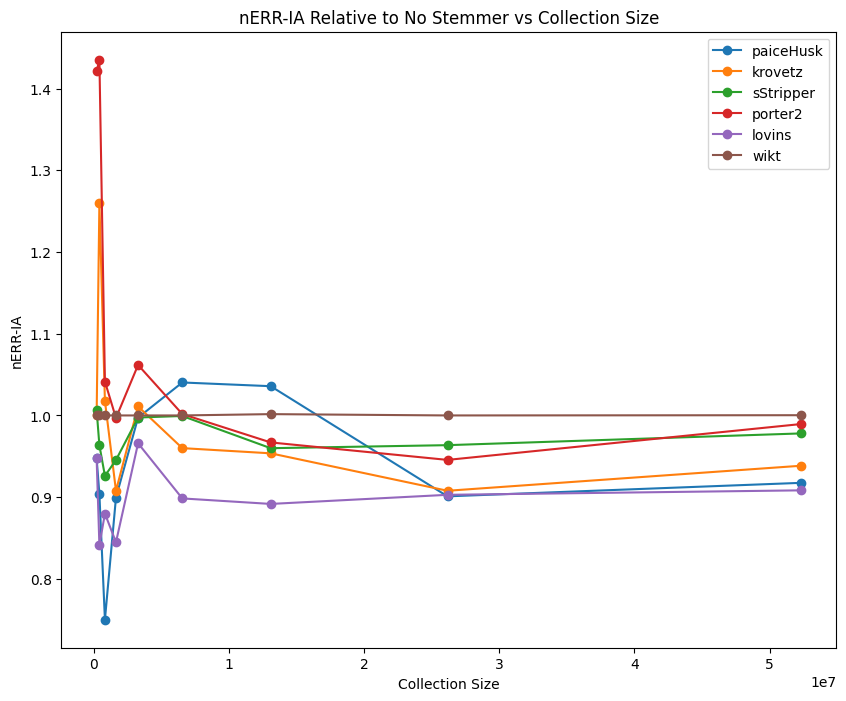

In [45]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    target_data = nERR[nERR["stemmer"] == stemmer]
    plt.plot(target_data["size"], target_data["value"], "o-", label=stemmer)

plt.title("nERR-IA vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nERR-IA")
plt.legend()
plt.show()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
none_values = np.array(nERR[nERR["stemmer"] == stemmer]["value"])
for stemmer in labels:
    if stemmer == "none": continue
    target_data = nERR[nERR["stemmer"] == stemmer]
    target_values = np.array(target_data["value"])/none_values
    plt.plot(target_data["size"], target_values, "o-", label=stemmer)

plt.title("nERR-IA Relative to No Stemmer vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nERR-IA")
plt.legend()
plt.show()

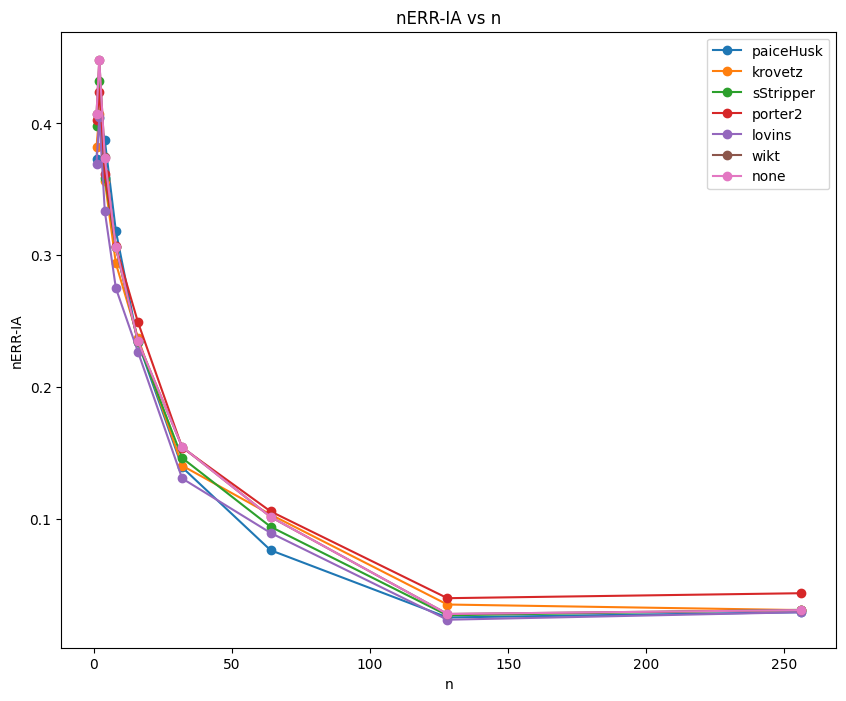

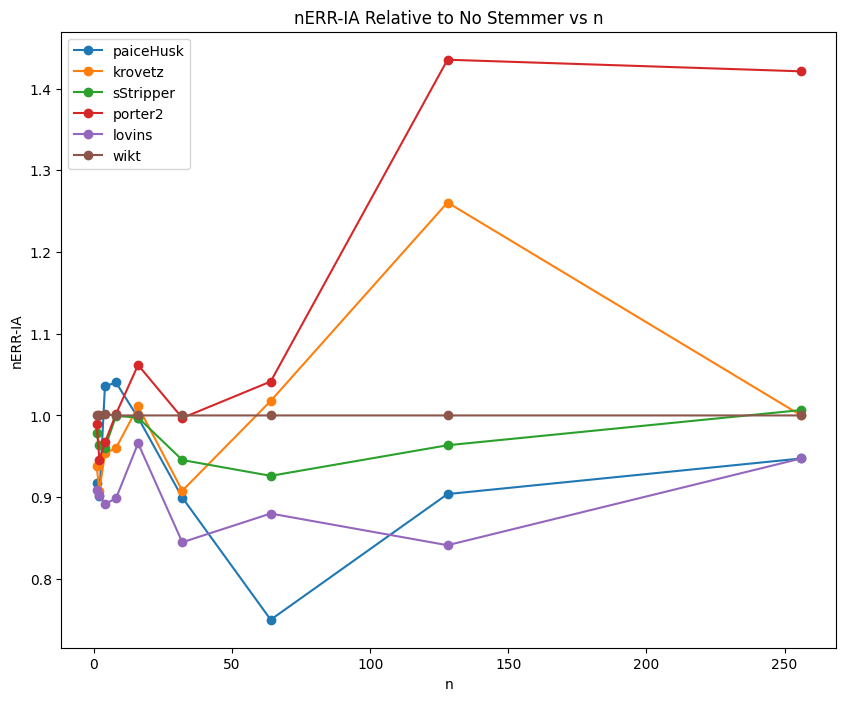

In [46]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    target_data = nERR[nERR["stemmer"] == stemmer]
    plt.plot(target_data["n"], target_data["value"], "o-", label=stemmer)

plt.title("nERR-IA vs n")
plt.xlabel("n")
plt.ylabel("nERR-IA")
plt.legend()
# plt.yscale("log")
plt.show()

# -------------------------------------------------------------------------------------

plt.figure(figsize=(10,8))
none_values = np.array(nERR[nERR["stemmer"] == stemmer]["value"])
for stemmer in labels:
    if stemmer == "none": continue
    target_data = nERR[nERR["stemmer"] == stemmer]
    target_values = np.array(target_data["value"])/none_values
    plt.plot(target_data["n"], target_values, "o-", label=stemmer)


plt.title("nERR-IA Relative to No Stemmer vs n")
plt.xlabel("n")
plt.ylabel("nERR-IA")
plt.legend()
plt.show()

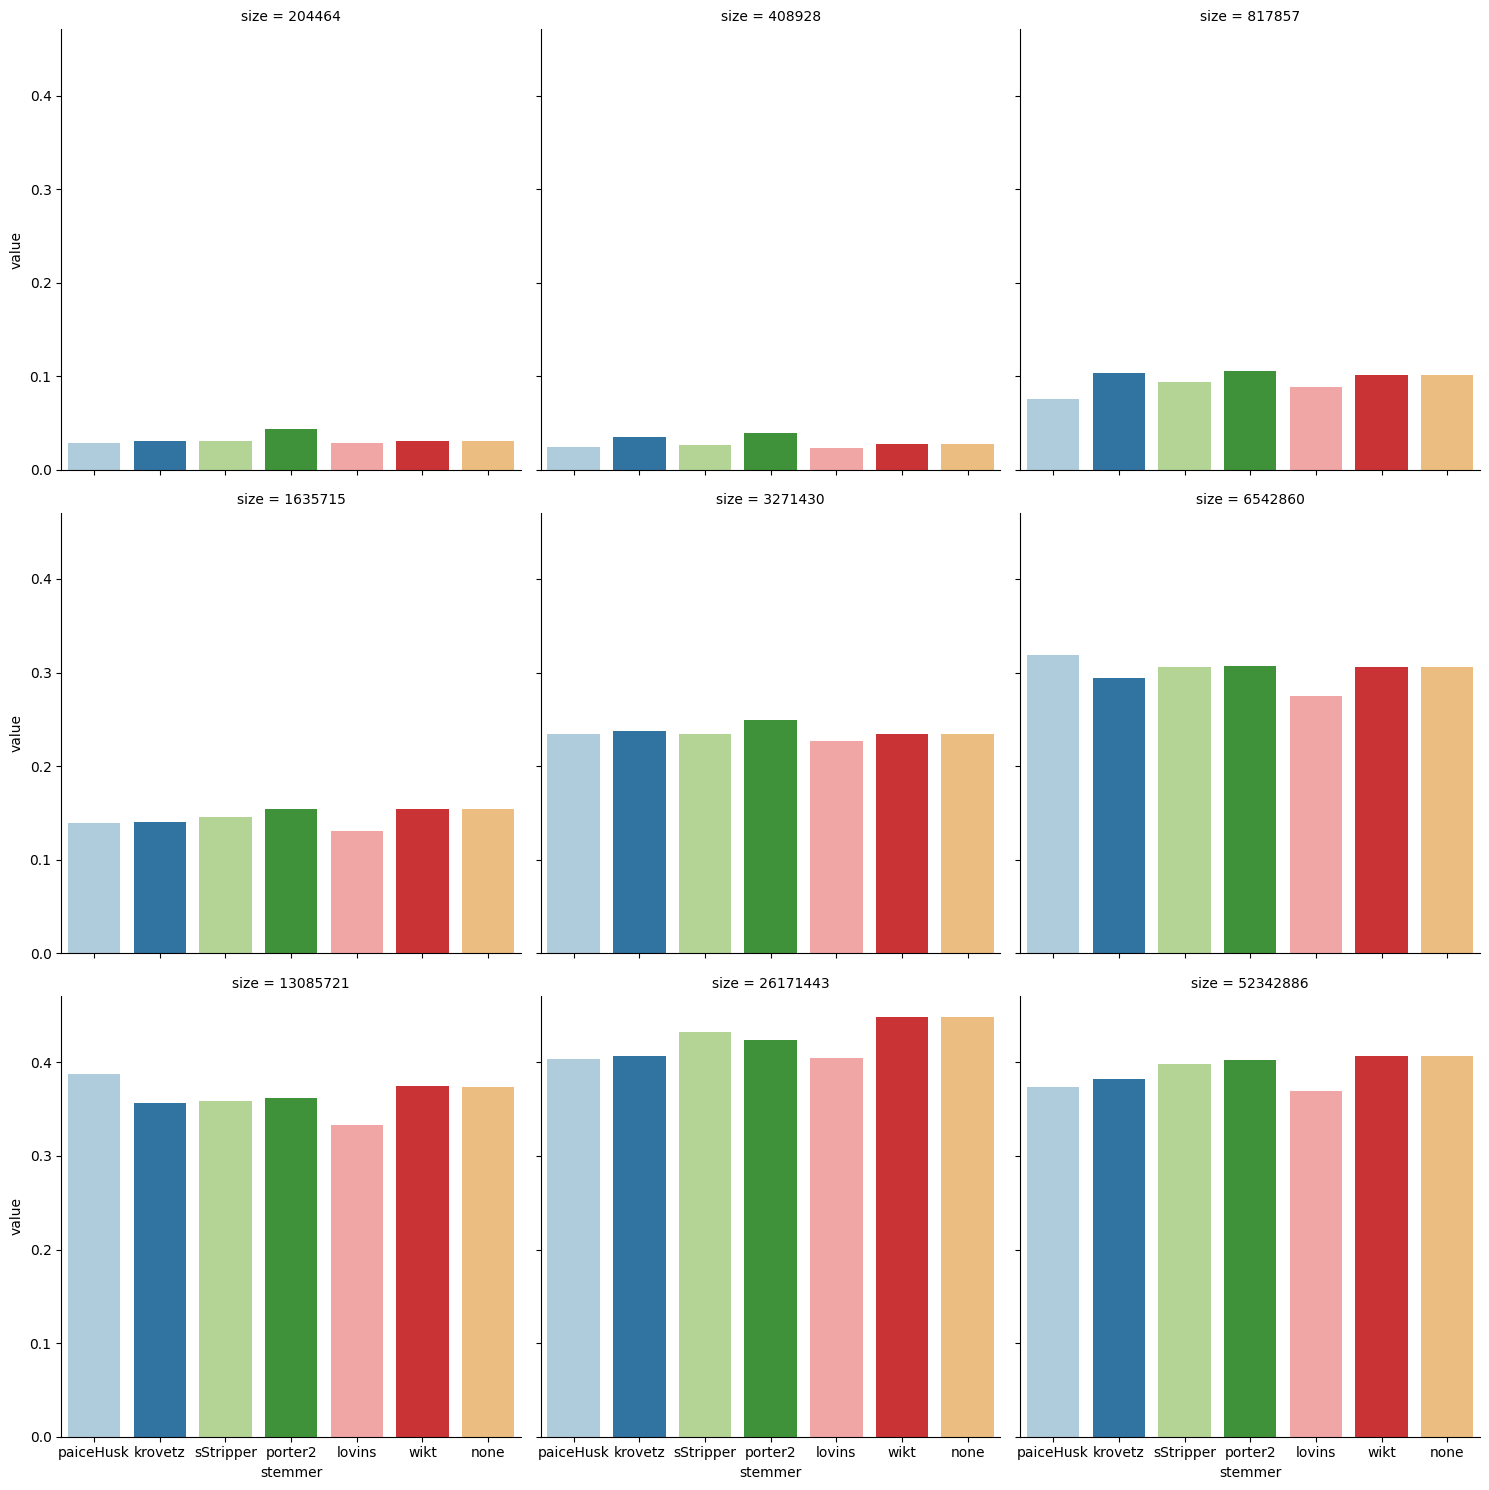

In [47]:
sns.catplot(data=nERR, kind="bar", x="stemmer", y="value", col="size", col_wrap=3, palette=sns.color_palette("Paired")[:len(labels)])
plt.show()

### nDCG

In [48]:
nDCG = clueweb_2013[clueweb_2013["measure"]=="nDCG"]

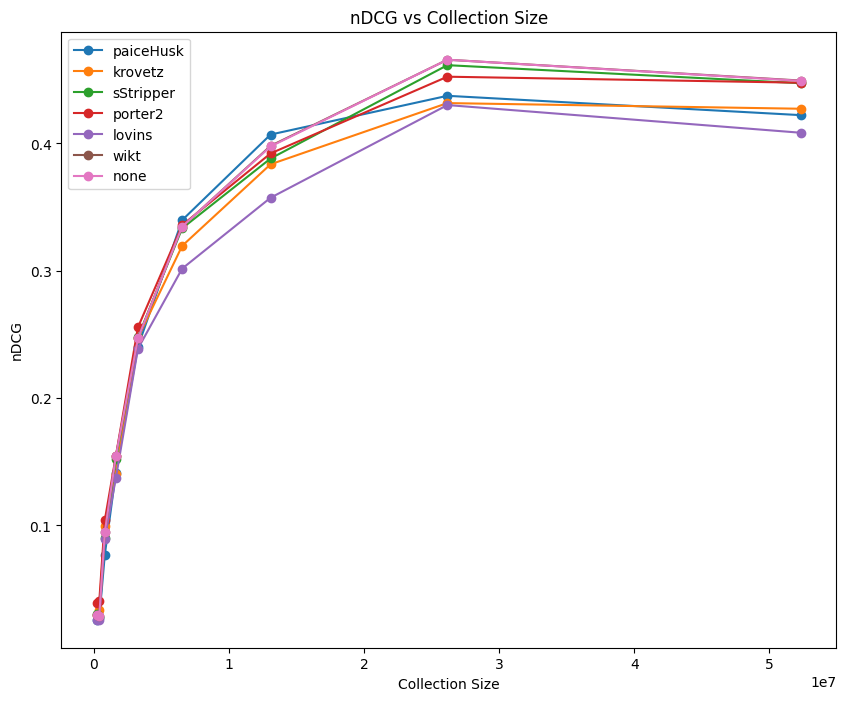

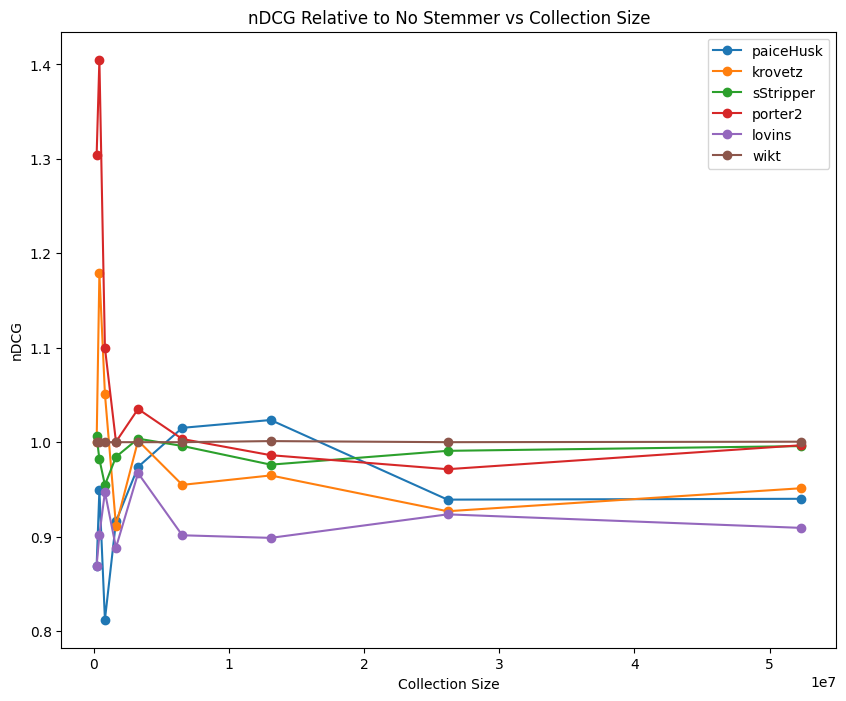

In [49]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    target_data = nDCG[nDCG["stemmer"] == stemmer]
    plt.plot(target_data["size"], target_data["value"], "o-", label=stemmer)

plt.title("nDCG vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nDCG")
plt.legend()
plt.show()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
none_values = np.array(nDCG[nDCG["stemmer"] == stemmer]["value"])
for stemmer in labels:
    if stemmer == "none": continue
    target_data = nDCG[nDCG["stemmer"] == stemmer]
    target_values = np.array(target_data["value"])/none_values
    plt.plot(target_data["size"], target_values, "o-", label=stemmer)

plt.title("nDCG Relative to No Stemmer vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nDCG")
plt.legend()
plt.show()

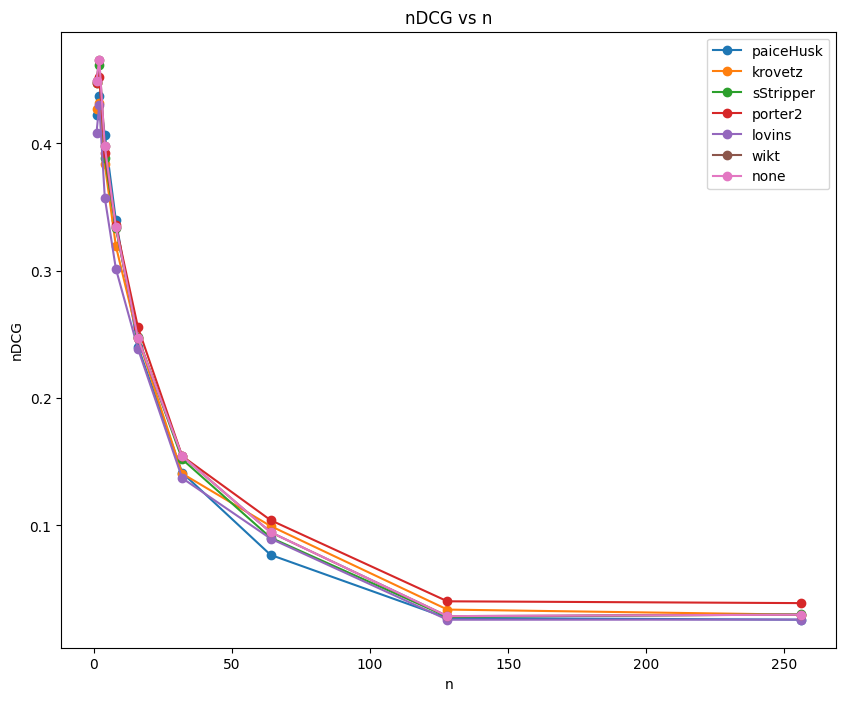

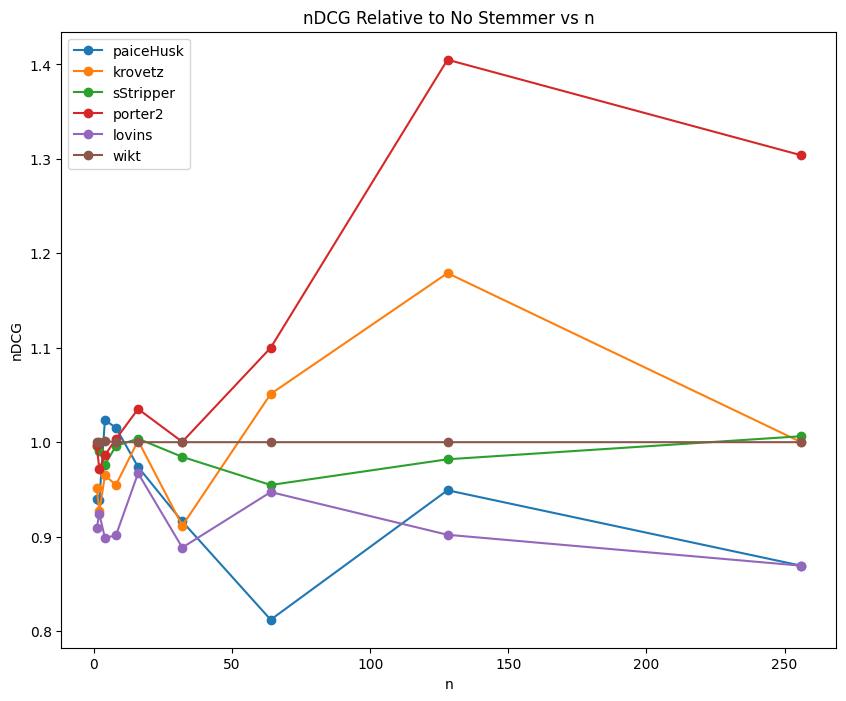

In [50]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    target_data = nDCG[nDCG["stemmer"] == stemmer]
    plt.plot(target_data["n"], target_data["value"], "o-", label=stemmer)

plt.title("nDCG vs n")
plt.xlabel("n")
plt.ylabel("nDCG")
plt.legend()
# plt.yscale("log")
plt.show()

# -------------------------------------------------------------------------------------

plt.figure(figsize=(10,8))
none_values = np.array(nDCG[nDCG["stemmer"] == stemmer]["value"])
for stemmer in labels:
    if stemmer == "none": continue
    target_data = nDCG[nDCG["stemmer"] == stemmer]
    target_values = np.array(target_data["value"])/none_values
    plt.plot(target_data["n"], target_values, "o-", label=stemmer)


plt.title("nDCG Relative to No Stemmer vs n")
plt.xlabel("n")
plt.ylabel("nDCG")
plt.legend()
plt.show()